In [1]:
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

tf.__version__, K.__version__

('1.9.0', '2.1.6-tf')

In [2]:
# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

# Word2Vec Parameter
batch_size = 20
embedding_size = 2 # To show 2 dim embedding graph
voc_size = len(word_list)

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(np.eye(voc_size)[data[i][1]])  # context word

    return np.array(random_inputs), np.array(random_labels)

# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])
        
# Model
model = Sequential()
model.add(Dense(embedding_size, kernel_initializer='random_uniform'))
model.add(Dense(voc_size, kernel_initializer='random_uniform', activation='softmax'))

model.compile(optimizer=K.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

# Train data
inputs = []
labels = []
for i in range(5000):
    batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
    inputs.append(batch_inputs)
    labels.append(batch_labels)
inputs = np.array(inputs)
labels = np.array(labels)

# Train epochs = 20 is enough
hist = model.fit(inputs, labels, batch_size=batch_size, epochs=20, verbose=0)

# Train result loss = 0.0001  acc = 0.32
print('Final loss:', '%04d' % (hist.history['loss'][-1]), 'acc =', '{:.6f}'.format(hist.history['acc'][-1]))

Final loss: 0001 acc = 0.339080


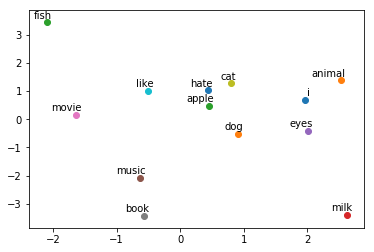

In [3]:
# show word2vec embedding
trained_embeddings = model.get_weights()[0]

for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()